In [1]:
#import cmapBQ
import os
import numpy as np
import requests
import matplotlib.pyplot as plt
import psutil

In [2]:
import sys
sys.path.insert(0,'/home/olgan96/.env/lib/python3.11/site-packages/')

In [3]:
#!pip3 install cmapBQ -q

In [4]:
#!pip3 install pandas -q

In [5]:
#!pip3 install tqdm -q

In [6]:
import pandas as pd
from tqdm import tqdm

In [7]:
import cmapBQ.query as cmap_query
import cmapBQ.config as cmap_config

# Load credentials

In [8]:
# URL with credentials
url = ('https://s3.amazonaws.com/data.clue.io/api/bq_creds/BQ-demo-credentials.json')

response = requests.get(url)
credentials_filepath='BQ-demo-credentials.json'

with open(credentials_filepath, 'w') as f:
    f.write(response.text)

# Set up credentials
cmap_config.setup_credentials(credentials_filepath)
bq_client = cmap_config.get_bq_client()

In [10]:
cmap_query.list_tables()

_includes_clustered_tables: <bound method TableDirectory._includes_clustered_tables of TableDirectory(compoundinfo='cmap-big-table.cmap_lincs_public_views.compoundinfo', genetic_pertinfo='cmap-big-table.cmap_lincs_public_views.genetic_pertinfo', geneinfo='cmap-big-table.cmap_lincs_public_views.geneinfo', cellinfo='cmap-big-table.cmap_lincs_public_views.cellinfo', instinfo='cmap-big-table.cmap_lincs_public_views.instinfo', siginfo='cmap-big-table.cmap_lincs_public_views.siginfo', level3='cmap-big-table.cmap_lincs_public_views.L1000_Level3_cid', level3_rid='cmap-big-table.cmap_lincs_public_views.L1000_Level3_rid', level3_landmark='cmap-big-table.cmap_lincs_public_views.L1000_Level3_landmark', level4='cmap-big-table.cmap_lincs_public_views.L1000_Level4_cid', level4_rid='cmap-big-table.cmap_lincs_public_views.L1000_Level4_rid', level4_landmark='cmap-big-table.cmap_lincs_public_views.L1000_Level4_landmark', level5='cmap-big-table.cmap_lincs_public_views.L1000_Level5_cid', level5_rid='cmap-b

# Cell Lines

In [9]:
core_cellinfo = cmap_query.cmap_cell(bq_client, 
  verbose=True,
)

Table: 
 cmap-big-table.cmap_lincs_public_views.cellinfo
Query:
 SELECT * FROM cmap-big-table.cmap_lincs_public_views.cellinfo 


In [10]:
core_cellinfo.shape

(248, 20)

In [11]:
cell_tumor = core_cellinfo[core_cellinfo['cell_type'] == 'tumor'].reset_index().copy()

In [12]:
cell_tumor['cell_iname'].unique()

array(['AG06263_2', 'AG06840_A', 'AG078N1_1', 'C42', 'HAP1', 'HIMG001',
       'HIMG002', 'HMELZ', 'HS27A', 'HUH751', 'IPS-15-2', 'IPS-3',
       'IPS-ND34732', 'MCH58', 'MCLF0067SZ', 'MCLF015CN', 'MCLF022CN',
       'MCLF027CN', 'MCLF033SZ', 'MCLF035SZ', 'MCLF037SZ', 'MCLF040SZ',
       'MCLF051CN', 'MCLF054CN', 'MCLF056CN', 'MCLF076SZ', 'MCLF100SZ',
       'MCLF117SZ', 'MCLF123SZ', 'MCLF126CN', 'MCLF130CN', 'MCLF135CN',
       'MCLF137CN', 'MCLF141SZ', 'MCLF162SZ', 'MICROGLIA-PSEN1', 'MNEU',
       'ND34732_7', 'NKDBA', 'P1A82', 'P2X2B2', 'SKB', 'HME1', 'BJAB',
       'HBL1', 'OCILY10', 'TMD8', 'TC32', 'H1299', 'H1975', 'HCC515',
       'SALE', 'SHSY5Y', '22RV1', 'HEC1A', 'U266B1', 'HL60', 'K562',
       'TF1', 'THP1', 'MINO', 'U937', 'A673', 'SKES1', 'U2OS', 'A549',
       'HCC827', 'NCIH1437', 'NCIH1563', 'NCIH1573', 'NCIH1694',
       'NCIH1781', 'NCIH1836', 'NCIH1975', 'NCIH2073', 'NCIH2110',
       'NCIH2172', 'NCIH596', 'NCIH838', 'NCIH841', 'SKLU1', 'A375',
       'HS944T', 'S

### Load save the data

In [11]:
#---------You can comment/uncomment the code lines:---------
#cell_tumor.to_parquet('../NO_BACKUP/cell_info.parquet', index=False)
cell_tumor = pd.read_parquet('../../NO_BACKUP/lincs_2020/cell_info.parquet')

# Genes

In [16]:
genes_info = cmap_query.cmap_genes(bq_client)

In [17]:
#---------You can comment/uncomment the code lines:---------
#genes_info.to_parquet('../NO_BACKUP/lincs_2020/genes_info.parquet', index=False)
#genes_info = pd.read_parquet('../NO_BACKUP/lincs_2020/genes_info.parquet')

# Signatures_info

In [12]:
siginfo_tumor = cmap_query.cmap_sig(     #Query the siginfo table
    bq_client,
    cell_iname = list(cell_tumor['cell_iname'].unique()),
    return_fields = 'all'
)

In [15]:
siginfo_tumor.columns

Index(['bead_batch', 'nearest_dose', 'pert_dose', 'pert_dose_unit',
       'pert_idose', 'pert_itime', 'pert_time', 'pert_time_unit',
       'cell_mfc_name', 'pert_mfc_id', 'nsample', 'cc_q75', 'ss_ngene', 'tas',
       'pct_self_rank_q25', 'wt', 'median_recall_rank_spearman',
       'median_recall_rank_wtcs_50', 'median_recall_score_spearman',
       'median_recall_score_wtcs_50', 'batch_effect_tstat',
       'batch_effect_tstat_pct', 'is_hiq', 'qc_pass', 'pert_id', 'sig_id',
       'pert_type', 'cell_iname', 'id', 'det_wells', 'det_plates',
       'distil_ids', 'build_name', 'project_code', 'cmap_name',
       'is_ncs_exemplar'],
      dtype='object')

In [16]:
siginfo_tumor_cp = siginfo_tumor[(siginfo_tumor['pert_type'] == 'trt_cp')]

In [22]:
siginfo_tumor_cp[siginfo_tumor_cp['nearest_dose'].isna()]#['pert_dose_unit'].unique()

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,...,pert_type,cell_iname,id,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_ncs_exemplar
11746,b41,NaN,10.000000,%,10 %,3 h,3.0,h,A549,GALR3_FBS,...,trt_cp,A549,<NA>,E13,GPR001_A549_XH_X1_B41,GPR001_A549_XH_X1_B41:E13,None,GPR,GALR3_FBS,0
38072,b39,NaN,0.625000,uM,0.63 uM,4 h,4.0,h,BJAB,BRD-K15592317,...,trt_cp,BJAB,<NA>,C03,AICHI002_BJAB_4H_X2_B39,AICHI002_BJAB_4H_X2_B39:C03,None,AICHI,CP-466722,0
38073,b32,NaN,0.039062,uM,0.04 uM,24 h,24.0,h,BJAB,BRD-K37142460,...,trt_cp,BJAB,<NA>,G11,AICHI001_BJAB_24H_X2_B32|AICHI001_BJAB_24H_X3_B32,AICHI001_BJAB_24H_X2_B32:G11|AICHI001_BJAB_24H...,None,AICHI,MI-2,0
38074,b39,NaN,0.156250,uM,0.16 uM,4 h,4.0,h,BJAB,BRD-K88510285,...,trt_cp,BJAB,<NA>,I10,AICHI002_BJAB_4H_X2_B39|AICHI002_BJAB_4H_X3_B39,AICHI002_BJAB_4H_X2_B39:I10|AICHI002_BJAB_4H_X...,None,AICHI,bortezomib,0
38075,b39,NaN,0.625000,uM,0.63 uM,4 h,4.0,h,BJAB,BRD-K55575531,...,trt_cp,BJAB,<NA>,K15,AICHI002_BJAB_4H_X2_B39|AICHI002_BJAB_4H_X3_B39,AICHI002_BJAB_4H_X2_B39:K15|AICHI002_BJAB_4H_X...,None,AICHI,BRD-K55575531,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035846,b32,NaN,2.500000,uM,2.5 uM,24 h,24.0,h,OCILY10,BRD-K04065047,...,trt_cp,OCILY10,<NA>,A14,AICHI002_OCILY10_24H_X1_B32|AICHI002_OCILY10_2...,AICHI002_OCILY10_24H_X1_B32:A14|AICHI002_OCILY...,None,AICHI,BRD-K04065047,0
1035847,b32,NaN,0.625000,uM,0.63 uM,24 h,24.0,h,OCILY10,BRD-K43002773,...,trt_cp,OCILY10,<NA>,G03,AICHI002_OCILY10_24H_X1_B32|AICHI002_OCILY10_2...,AICHI002_OCILY10_24H_X1_B32:G03|AICHI002_OCILY...,None,AICHI,GDC-0068,0
1035848,b32,NaN,0.009756,uM,0.01 uM,24 h,24.0,h,OCILY10,BRD-A75409952,...,trt_cp,OCILY10,<NA>,O06,AICHI002_OCILY10_24H_X1_B32|AICHI002_OCILY10_2...,AICHI002_OCILY10_24H_X1_B32:O06|AICHI002_OCILY...,None,AICHI,wortmannin,0
1035849,b39,NaN,0.625000,uM,0.63 uM,4 h,4.0,h,OCILY10,BRD-K24666289,...,trt_cp,OCILY10,<NA>,D03,AICHI002_OCILY10_4H_X2_B39|AICHI002_OCILY10_4H...,AICHI002_OCILY10_4H_X2_B39:D03|AICHI002_OCILY1...,None,AICHI,copanlisib,0


In [ ]:
plt.hist(siginfo_tumor_cp['tas'])

In [22]:
#---------You can comment/uncomment the code lines:---------
#siginfo_tumor_cp.reset_index().to_parquet('../NO_BACKUP/lincs_2020/sig_info.parquet', index=False)
siginfo_tumor_cp = pd.read_parquet('../NO_BACKUP/lincs_2020/sig_info.parquet')

# Signature matrix

### Here I focused on the landmark genes, it is the default option (we can add other genes later)

In [ ]:
# I just moved this part of the code to the python script (download_matrices.py). 
#Here I am trying to download matrix data through batches.
'''
sig_ids = pd.read_parquet('../NO_BACKUP/sig_info.parquet').sig_id.values
n = len(sig_ids)//4000

for i in range(52, n + 1):
    print(i)
    batch = sig_ids[i * 4000 :(i + 1) * 4000]
    cmap_query.cmap_matrix(bq_client, cid=list(batch), verbose=False,).data_df.T.to_parquet('../NO_BACKUP/matrices/matrix_' + str(i) + '.parquet')
'''

In [19]:
matrix = pd.read_parquet('../NO_BACKUP/lincs_2020/matrices/matrix_0.parquet')

(array([  4.,   9.,  30., 179., 567., 156.,  25.,   4.,   3.,   1.]),
 array([-7.23892069, -5.61782575, -3.9967308 , -2.37563586, -0.75454092,
         0.86655402,  2.48764896,  4.10874391,  5.72983885,  7.35093379,
         8.97202873]),
 <BarContainer object of 10 artists>)

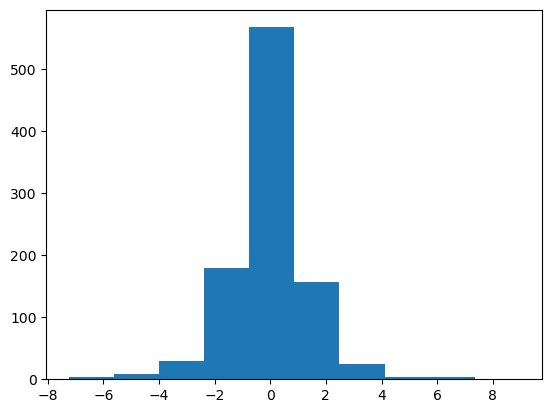

In [22]:
plt.hist(matrix.iloc[0])

### The info about genes:

In [23]:
genes_info['feature_space'].unique()

array(['inferred', 'landmark', 'best inferred'], dtype=object)

In [24]:
genes_info[genes_info['gene_id'].astype(str).isin(matrix.columns.unique())]

,gene_id,gene_symbol,ensembl_id,gene_title,gene_type,src,feature_space
2154,16,AARS,ENSG00000090861,alanyl-tRNA synthetase,protein-coding,NCBI,landmark
2155,23,ABCF1,ENSG00000204574,ATP binding cassette subfamily F member 1,protein-coding,NCBI,landmark
2156,25,ABL1,ENSG00000097007,"ABL proto-oncogene 1, non-receptor tyrosine ki...",protein-coding,NCBI,landmark
2157,30,ACAA1,ENSG00000060971,acetyl-CoA acyltransferase 1,protein-coding,NCBI,landmark
2158,39,ACAT2,ENSG00000120437,acetyl-CoA acetyltransferase 2,protein-coding,NCBI,landmark
...,...,...,...,...,...,...,...
3127,200081,TXLNA,ENSG00000084652,taxilin alpha,protein-coding,NCBI,landmark
3128,200734,SPRED2,ENSG00000198369,sprouty related EVH1 domain containing 2,protein-coding,NCBI,landmark
3129,256364,EML3,ENSG00000149499,EMAP like 3,protein-coding,NCBI,landmark
3130,375346,STIMATE,ENSG00000213533,STIM activating enhancer,protein-coding,NCBI,landmark


In [18]:
#Uniting downloaded matrices to one:
i = 0
matrices = pd.read_parquet('../NO_BACKUP/lincs_2020/matrices/matrix_' + str(i) + '.parquet')
for i in tqdm(range(1, 153)):
    matrix = pd.read_parquet('../NO_BACKUP/lincs_2020/matrices/matrix_' + str(i) + '.parquet')
    matrices = pd.concat([matrices, matrix])

100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


In [19]:
matrices

rid,10007,1001,10013,10038,10046,10049,10051,10057,10058,10059,...,9918,9924,9926,9928,993,994,9943,9961,998,9988
cid,,,,,,,,,,,,,,,,,,,,,
ABY001_A375_XH:BRD-A61304759:0.625:3,0.794862,-0.358541,0.122322,-0.550787,-0.178181,1.566406,0.058614,0.308965,0.369855,-0.948085,...,-0.737773,-1.188786,0.710014,0.212338,0.813161,-1.252179,-2.421624,-0.335863,0.308946,-0.352101
ABY001_A549_XH:BRD-K19687926:2.5:24,-0.095550,-0.321700,0.520950,-1.791700,-0.533900,-0.506850,-0.564850,-0.132950,1.675450,-1.069450,...,1.397350,-1.295500,-0.930400,-0.023250,-0.183700,1.109500,0.092450,0.238550,-0.012600,0.597850
ABY001_A549_XH:BRD-K66175015:0.625:3,-0.813987,0.994036,-0.751718,0.506185,-0.458096,-0.213104,0.171058,0.325874,0.423714,0.073181,...,0.098779,-1.029424,0.704381,0.182440,-0.227059,1.114676,-0.840735,-1.194021,1.145337,-0.024950
ABY001_A549_XH:BRD-K70401845:2.5:3,-0.037693,2.994998,2.537898,-0.022970,0.017180,-2.043038,0.541121,-0.887740,-0.001072,0.125974,...,-0.380591,-0.994680,-0.725285,0.646672,0.404207,0.550604,0.827361,-0.004402,1.381769,7.207140
ABY001_H1975_XH:BRD-K85606544:2.5:24,1.417155,1.724255,1.576782,-1.560288,2.167926,-0.534284,-2.426705,3.574270,2.142852,-3.120374,...,-0.512739,1.792720,2.296156,2.932602,-2.103152,-2.459100,-0.951095,0.234279,-2.103937,0.314254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRISM001_A375_6H:BRD-K83963101-001-01-0:10,0.936298,0.339311,1.316129,0.399501,1.563710,-2.070823,1.553339,0.704265,0.537702,-0.999537,...,1.059100,1.865572,-0.660864,1.538919,-2.052284,1.044127,0.743006,-1.805733,-0.473114,-1.076864
PRISM001_MCF7_6H:BRD-K01737880:0.312,0.243585,0.186558,0.191058,-0.332946,-0.218846,0.561296,0.024447,0.266097,-1.681254,-1.449297,...,0.008941,-0.972422,-0.237254,-0.511767,0.571823,-9.522978,0.058292,-0.530437,0.031650,-0.079017
PRISM001_MCF7_6H:BRD-K47121420-001-01-4:10,-0.216454,-0.499579,-1.897172,-0.502968,-0.950065,0.287036,-0.467876,0.744645,-0.979391,0.350110,...,-0.145144,-0.650584,0.001831,-0.425075,-0.201165,-1.077324,-0.746765,-0.763034,-0.756488,-0.615686


In [20]:
matrices.to_parquet('../NO_BACKUP/lincs_2020/sig_matrix.parquet', index=True)

# Compounds

In [25]:
# Download all compounds information
compounds = cmap_query.cmap_compounds(bq_client,
    cmap_name = list(siginfo_tumor_cp['cmap_name'].unique()),
)

In [27]:
compounds.to_parquet('../NO_BACKUP/lincs_2020/comp_info.parquet', index=False)

In [43]:
# Check how many compounds do not have smiles info
compounds[compounds['canonical_smiles'].isna()]

,pert_id,cmap_name,target,moa,canonical_smiles,inchi_key,compound_aliases
25311,BRD-A77414132,emetine-hcl,None,None,None,None,None
25312,BRD-A91712064,BRD-A91712064,None,None,None,None,None
25313,BRD-K34532661,BRD-K34532661,None,None,None,None,None
25314,BRD-K99006945,BRD-K99006945,None,None,None,None,None
25315,BRD-A42556028,1B,None,None,None,None,None
...,...,...,...,...,...,...,...
33397,BRD-A71480800,abamectin,GABBR2,GABA receptor agonist,None,None,None
34211,BRD-K31965398,aclarubicin,TOP1,Topoisomerase inhibitor,None,None,None
34212,BRD-K31965398,aclarubicin,TOP2A,Topoisomerase inhibitor,None,None,None
36987,BRD-K79042054,octreotide,SSTR2,Somatostatin receptor agonist,None,None,None
